In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
dischNum='127531'
framenum=160

In [3]:
data=np.fromfile('data/'+dischNum+'.dat',np.uint32)

In [4]:
wavelength36 = np.loadtxt("data/wavelength36.txt", comments="fit36_2")
calibrationFactor = np.loadtxt("data/CalibrationFactor.txt", comments="CalFactor_2")

In [5]:
data3 = [[[0 for d3 in range(int(len(data)/2048/52))] for d2 in range(52)] for d1 in range(2048)]

In [6]:
for k in range(int(len(data)/2048/52)):
    for j in range(52):
        for i in range(2048):
            data3[i][j][k] = data[i+2048*j+2048*52*k]    

In [7]:
binNum=27
##ここはわからん

In [8]:
exposureTime = 0.001
transmittanceWindow=0.92
coefQe=0.47
readOutNoise=1.2

In [9]:
data2 = [[0 for d2 in range(52)] for d1 in range(2048)]

for j in range(52):
    for i in range(2048):
        data2[i][j] = data[i+2048*j+2048*52*framenum]

In [10]:
data4 = [[0 for d2 in range(36)] for d1 in range(2048)]

for i in range(2048):
    # L port
    data4[i][0] = data2[i][22]-(1*data2[i][19]+3*data2[i][23])/4
    data4[i][1] = data2[i][9]-(1*data2[i][6]+3*data2[i][10])/4
    data4[i][2] = data2[i][21]-(2*data2[i][19]+2*data2[i][23])/4
    data4[i][3] = data2[i][8]-(2*data2[i][6]+2*data2[i][10])/4
    data4[i][4] = data2[i][20]-(3*data2[i][19]+1*data2[i][23])/4
    data4[i][5] = data2[i][7]-(3*data2[i][6]+1*data2[i][10])/4
    data4[i][6] = data2[i][18]-(1*data2[i][16]+2*data2[i][19])/3
    data4[i][7] = data2[i][5]-(1*data2[i][3]+2*data2[i][6])/3
    data4[i][8] = data2[i][17]-(2*data2[i][16]+1*data2[i][19])/3
    data4[i][9] = data2[i][4]-(2*data2[i][3]+1*data2[i][6])/3
    data4[i][10] = data2[i][15]-(1*data2[i][13]+2*data2[i][16])/3
    data4[i][11] = data2[i][2]-(1*data2[i][0]+2*data2[i][3])/3
    data4[i][12] = data2[i][14]-(2*data2[i][13]+1*data2[i][16])/3
    data4[i][13] = data2[i][1]-(2*data2[i][0]+1*data2[i][3])/3
    # O port
    data4[i][14] = data2[i][50]-(1*data2[i][48]+2*data2[i][51])/3
    data4[i][15] = data2[i][37]-(1*data2[i][35]+2*data2[i][38])/3
    data4[i][16] = data2[i][49]-(2*data2[i][48]+1*data2[i][51])/3
    data4[i][17] = data2[i][36]-(2*data2[i][35]+1*data2[i][38])/3
    data4[i][18] = data2[i][47]-(1*data2[i][45]+2*data2[i][48])/3
    data4[i][19] = data2[i][34]-(1*data2[i][32]+2*data2[i][35])/3
    data4[i][20] = data2[i][46]-(2*data2[i][45]+1*data2[i][48])/3
    data4[i][21] = data2[i][33]-(2*data2[i][32]+1*data2[i][35])/3
    data4[i][22] = data2[i][44]-(1*data2[i][41]+3*data2[i][45])/4
    data4[i][23] = data2[i][31]-(1*data2[i][28]+3*data2[i][32])/4
    data4[i][24] = data2[i][43]-(2*data2[i][41]+2*data2[i][45])/4
    data4[i][25] = data2[i][30]-(2*data2[i][28]+2*data2[i][32])/4
    data4[i][26] = data2[i][42]-(3*data2[i][41]+1*data2[i][45])/4
    data4[i][27] = data2[i][29]-(3*data2[i][28]+1*data2[i][32])/4
    data4[i][28] = data2[i][40]-(1*data2[i][38]+2*data2[i][41])/3
    data4[i][29] = data2[i][27]-(1*data2[i][23]+4*data2[i][28])/5
    data4[i][30] = data2[i][39]-(2*data2[i][38]+1*data2[i][41])/3
    data4[i][31] = data2[i][26]-(2*data2[i][23]+3*data2[i][28])/5
    data4[i][32] = data2[i][25]-(3*data2[i][23]+2*data2[i][28])/5
    data4[i][33] = data2[i][12]-(1*data2[i][10]+2*data2[i][13])/3
    data4[i][34] = data2[i][24]-(4*data2[i][23]+1*data2[i][28])/5
    data4[i][35] = data2[i][11]-(2*data2[i][10]+1*data2[i][13])/3

In [11]:
spectrum36 = [[0 for d2 in range(36)] for d1 in range(2048)]

for j in range(36):
    for i in range(2048):
        spectrum36[i][j] = data4[i][j] * calibrationFactor[i][j] / exposureTime / transmittanceWindow

In [12]:
sigma36 = [[0 for d2 in range(36)] for d1 in range(2048)]

for j in range(36):
    for i in range(2048):
        sigma36[i][j] = readOutNoise*readOutNoise*binNum*2
        if data4[i][j] > 0:
            sigma36[i][j] += data4[i][j]*coefQe
        sigma36[i][j] = np.sqrt(sigma36[i][j]) * calibrationFactor[i][j] / exposureTime / coefQe /transmittanceWindow

In [13]:
f=open("data/d"+dischNum+"_f"+str(framenum)+"_spec","wb")
pickle.dump(spectrum36,f)
f.close()

f=open("data/d"+dischNum+"_f"+str(framenum)+"_sigma","wb")
pickle.dump(sigma36,f)
f.close()

# ika huyou

(0.01, 100)

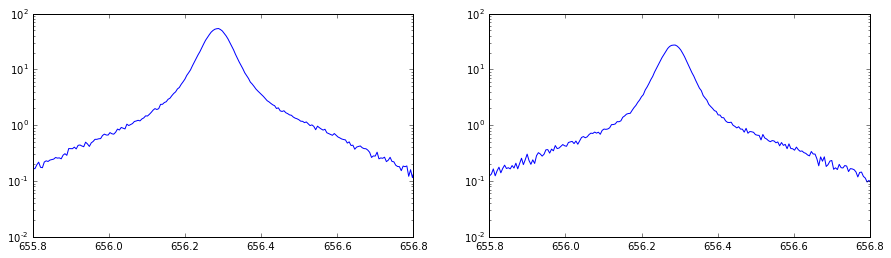

In [14]:
dischNum_1 = '127531'
framenum_1 = 160
LOSnum_1 ="11"

dischNum_2 = '127532'
framenum_2 = 160
LOSnum_2 ="11"

wavelength36 = np.loadtxt("data/wavelength36.txt", comments="fit36_2")
f=open("data/d"+dischNum_1+"_f"+str(framenum_1)+"_spec","rb")
spectrum36_1=pickle.load(f)
f.close()
f=open("data/d"+dischNum_1+"_f"+str(framenum_1)+"_sigma","rb")
sigma36_1=pickle.load(f)
f.close()

wavelength36 = np.loadtxt("data/wavelength36.txt", comments="fit36_2")
f=open("data/d"+dischNum_2+"_f"+str(framenum_2)+"_spec","rb")
spectrum36_2=pickle.load(f)
f.close()
f=open("data/d"+dischNum_2+"_f"+str(framenum_2)+"_sigma","rb")
sigma36_2=pickle.load(f)
f.close()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot([wavelength36[i][int(LOSnum_1)]for i in range(2048)],[spectrum36_1[i][int(LOSnum_1)] for i in range(2048)])
plt.yscale('log')
plt.xlim(655.8,656.8)
plt.ylim(0.01,100)
plt.subplot(1,2,2)
plt.plot([wavelength36[i][int(LOSnum_2)]for i in range(2048)],[spectrum36_2[i][int(LOSnum_2)] for i in range(2048)])
plt.yscale('log')
plt.xlim(655.8,656.8)
plt.ylim(0.01,100)